# Generate figures and tables

## Set up

In [34]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

fsize = 8
tsize = 8
tdir = 'in'
major = 5.0
minor = 3.0
lwidth = 0.8
lhandle = 2.0
plt.style.use('grid')
# plt.style.use('default')
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = 5.0
plt.rcParams['ytick.minor.size'] = 3.0
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

# errbar_kwargs = dict(marker='.', markersize=3, capsize=3, elinewidth=1, lw=1)
# plot_kwargs = dict(marker='.', markersize=3, lw=1)
# errband_kwargs = dict(alpha=0.25)
errbar_kwargs = dict(estimator='mean', errorbar=('ci', 95), errwidth=1.25, capsize=0.05,)

save_dir = '../paper/figs/experiments'

In [35]:
task_label_map = {'1task_between': 'between', '1task_match_patt': 'match pattern', 'occurs': 'occurs', 'xoccurs': 'xoccurs', 'same': 'same'}

model_label_map = {
    'corelnet': 'CoRelNet',
    'predinet': 'PrediNet', 'transformer': 'Transformer',
    'relconvnet': 'RelConvNet',
    'tempgroup_relconvnet': 'RelConvNet (Temporal G)',
    'featuregroup_relconvnet': 'RelConvNet (Feature G)',
    'contextgroup_relconvnet': 'RelConvNet (Contextual G)'
    }

cmap = plt.cm.tab10
color_map = {
    'CoRelNet': cmap(1),
    'PrediNet': cmap(3), 'Transformer': cmap(2),
    'RelConvNet': cmap(0),
    'RelConvNet (Temporal G)': cmap(9),
    'RelConvNet (Feature G)': cmap(6),
    'RelConvNet (Contextual G)': cmap(4)
    }

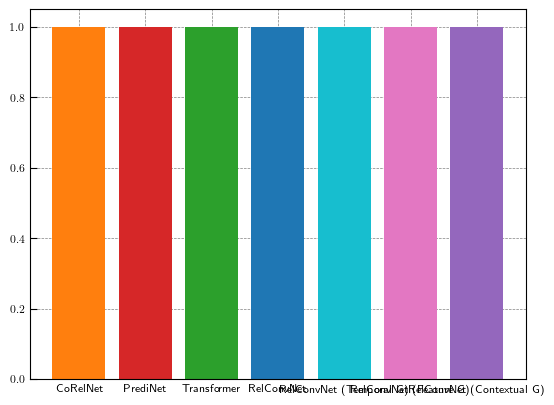

In [36]:
plt.bar(list(range(len(color_map))), 1, color=color_map.values());
plt.xticks(list(range(len(color_map))), color_map.keys());

## Relational Games

### OoD generalization table

In [37]:
results_df = pd.read_csv('figure_data/relational_games/end-of-training-accuracy.csv', index_col=0)
results_df

,group,name,stripes_acc,hexos_acc,acc,trial,task
0,contextgroup_relconvnet,trial = 4,0.9824,0.9870,1.0,4,same
1,contextgroup_relconvnet,trial = 2,0.9920,0.9836,1.0,2,same
2,contextgroup_relconvnet,trial = 3,0.9650,0.9780,1.0,3,same
3,contextgroup_relconvnet,trial = 1,0.9256,0.9730,1.0,1,same
4,contextgroup_relconvnet,trial = 0,0.9812,0.9840,1.0,0,same
...,...,...,...,...,...,...,...
40,randomgroup_relconvnet,trial = 3,NaN,NaN,NaN,3,1task_between
41,randomgroup_relconvnet,trial = 4,NaN,NaN,NaN,4,1task_between
42,randomgroup_relconvnet,trial = 1,NaN,NaN,NaN,1,1task_between
43,randomgroup_relconvnet,trial = 2,NaN,NaN,NaN,2,1task_between


In [38]:
results_df.groupby(['task', 'group']).aggregate(['mean', 'std', 'count'])

C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\3053617087.py:1: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  results_df.groupby(['task', 'group']).aggregate(['mean', 'std', 'count'])


stripes_acc                  \
                                                mean       std count   
task             group                                                 
1task_between    contextgroup_relconvnet     0.97188  0.025980     5   
                 corelnet                    0.58192  0.140413     5   
                 featuregroup_relconvnet     0.98088  0.005863     5   
                 predinet                    0.95008  0.041576     5   
                 randomgroup_relconvnet          NaN       NaN     0   
                 relconvnet                  0.98784  0.004293     5   
                 tempgroup_relconvnet        0.97876  0.007934     5   
                 transformer                 0.96068  0.021395     5   
1task_match_patt contextgroup_relconvnet     0.89556  0.134039     5   
                 corelnet                    0.58096  0.058573     5   
                 featuregroup_relconvnet     0.95756  0.021121     5   
                 predinet                    0.65840  0.118262     5   
                 relconvnet                  0.87004  0.090897     5   
                 tempgroup_relconvnet        0.96748  0.005571     5   
                 transformer                 0.59064  0.012304     5   
occurs           contextgroup_relconvnet     0.83020  0.077020     3   
                 corelnet                    0.51776  0.026946     5   
                 featuregroup_relconvnet     0.74652  0.221102     5   
                 predinet                    0.77452  0.103593     5   
                 relconvnet                  0.87968  0.034573     5   
                 tempgroup_relconvnet        0.91956  0.026932     5   
                 transformer                 0.72432  0.046718     5   
same             contextgroup_relconvnet     0.96924  0.026252     5   
                 corelnet                    0.72396  0.251464     5   
                 featuregroup_relconvnet     0.97808  0.013523     5   
                 predinet                    0.98348  0.016231     5   
                 relconvnet                  0.97404  0.006798     5   
                 tempgroup_relconvnet        0.96480  0.016667     5   
                 transformer                 0.99268  0.009901     5   
xoccurs          contextgroup_relconvnet     0.90072  0.065065     5   
                 corelnet                    0.60560  0.077542     5   
                 featuregroup_relconvnet     0.75360  0.229646     5   
                 predinet                    0.80960  0.063124     5   
                 relconvnet                  0.94552  0.013424     5   
                 tempgroup_relconvnet        0.93896  0.027384     5   
                 transformer                 0.75272  0.070172     5   

                                         hexos_acc                       acc  \
                                              mean       std count      mean   
task             group                                                         
1task_between    contextgroup_relconvnet   0.99236  0.003485     5  0.999960   
                 corelnet                  0.99548  0.002834     5  1.000000   
                 featuregroup_relconvnet   0.99320  0.002818     5  0.999760   
                 predinet                  0.97764  0.012614     5  0.986600   
                 randomgroup_relconvnet        NaN       NaN     0       NaN   
                 relconvnet                0.99088  0.001758     5  1.000000   
                 tempgroup_relconvnet      0.99188  0.002989     5  0.999840   
                 transformer               0.98604  0.006336     5  0.993000   
1task_match_patt contextgroup_relconvnet   0.93488  0.104510     5  0.953520   
                 corelnet                  0.94156  0.024607     5  1.000000   
                 featuregroup_relconvnet   0.97556  0.007422     5  0.999800   
                 predinet                  0.71020  0.088436     5  0.743000   
                 relconvnet     

In [39]:
models = model_label_map.keys() #['relconvnet', 'corelnet', 'predinet', 'transformer']
group_filter = results_df.group.isin(models)
results_df = results_df[group_filter]

results_df['group'] = pd.Categorical(results_df['group'], categories=models, ordered=True)
results_df.sort_values('group', inplace=True)
results_df

C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\948118428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['group'] = pd.Categorical(results_df['group'], categories=models, ordered=True)
C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\948118428.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.sort_values('group', inplace=True)


,group,name,stripes_acc,hexos_acc,acc,trial,task
24,corelnet,trial = 1,0.6588,0.9600,1.0000,1,1task_match_patt
33,corelnet,trial = 0,0.4954,0.8996,1.0000,0,1task_match_patt
23,corelnet,trial = 4,0.5770,0.9588,1.0000,4,1task_match_patt
29,corelnet,trial = 1,0.4964,0.9820,1.0000,1,same
28,corelnet,trial = 0,0.9822,1.0000,1.0000,0,same
...,...,...,...,...,...,...,...
1,contextgroup_relconvnet,trial = 2,0.9266,0.9870,0.9998,2,1task_between
0,contextgroup_relconvnet,trial = 4,0.9850,0.9912,1.0000,4,1task_between
2,contextgroup_relconvnet,trial = 2,0.9700,0.9726,0.9912,2,xoccurs
2,contextgroup_relconvnet,trial = 2,0.9726,0.9784,1.0000,2,1task_match_patt


In [40]:
tasks = ['same', 'occurs', 'xoccurs', '1task_between', '1task_match_patt']
results_df['task'] = pd.Categorical(results_df['task'], categories=tasks, ordered=True)
results_df.sort_values(['task', 'group'], inplace=True)
results_df

C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\4165208035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['task'] = pd.Categorical(results_df['task'], categories=tasks, ordered=True)
C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\4165208035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.sort_values(['task', 'group'], inplace=True)


,group,name,stripes_acc,hexos_acc,acc,trial,task
29,corelnet,trial = 1,0.4964,0.9820,1.0000,1,same
28,corelnet,trial = 0,0.9822,1.0000,1.0000,0,same
27,corelnet,trial = 3,0.6462,0.9882,1.0000,3,same
26,corelnet,trial = 2,0.9998,1.0000,1.0000,2,same
25,corelnet,trial = 4,0.4952,0.9696,1.0000,4,same
...,...,...,...,...,...,...,...
0,contextgroup_relconvnet,trial = 4,0.9532,0.9790,0.9998,4,1task_match_patt
1,contextgroup_relconvnet,trial = 3,0.9536,0.9846,0.9992,3,1task_match_patt
3,contextgroup_relconvnet,trial = 1,0.6566,0.7480,0.7688,1,1task_match_patt
4,contextgroup_relconvnet,trial = 0,0.9418,0.9844,0.9998,0,1task_match_patt


In [41]:
results_df['group'] = results_df['group'].map(model_label_map)

results_df['task'] = results_df['task'].map(task_label_map, na_action='ignore')

C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\541118849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['group'] = results_df['group'].map(model_label_map)
C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\541118849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['task'] = results_df['task'].map(task_label_map, na_action='ignore')


In [42]:
results_df.rename(columns={'group': 'Model', 'task': 'Task'}, inplace=True)

C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\2183473800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.rename(columns={'group': 'Model', 'task': 'Task'}, inplace=True)


In [43]:
metric_cols = ['hexos_acc', 'stripes_acc']

agg_df = results_df.groupby(['Task', 'Model'])[metric_cols].aggregate(['mean', 'sem'])
agg_df = agg_df.round(3)
agg_df

hexos_acc        stripes_acc       
                                             mean    sem        mean    sem
Task          Model                                                        
same          CoRelNet                      0.988  0.006       0.724  0.112
              PrediNet                      0.990  0.004       0.983  0.007
              Transformer                   0.997  0.001       0.993  0.004
              RelConvNet                    0.989  0.002       0.974  0.003
              RelConvNet (Temporal G)       0.981  0.002       0.965  0.007
              RelConvNet (Feature G)        0.985  0.001       0.978  0.006
              RelConvNet (Contextual G)     0.981  0.002       0.969  0.012
occurs        CoRelNet                      0.992  0.004       0.518  0.012
              PrediNet                      0.907  0.020       0.775  0.046
              Transformer                   0.881  0.015       0.724  0.021
              RelConvNet                    0.980  0.001       0.880  0.015
              RelConvNet (Temporal G)       0.983  0.001       0.920  0.012
              RelConvNet (Feature G)        0.788  0.112       0.747  0.099
              RelConvNet (Contextual G)     0.951  0.004       0.830  0.044
xoccurs       CoRelNet                      0.980  0.007       0.606  0.035
              PrediNet                      0.872  0.036       0.810  0.028
              Transformer                   0.867  0.017       0.753  0.031
              RelConvNet                    0.967  0.001       0.946  0.006
              RelConvNet (Temporal G)       0.963  0.006       0.939  0.012
              RelConvNet (Feature G)        0.760  0.107       0.754  0.103
              RelConvNet (Contextual G)     0.942  0.020       0.901  0.029
between       CoRelNet                      0.995  0.001       0.582  0.063
              PrediNet                      0.978  0.006       0.950  0.019
              Transformer                   0.986  0.003       0.961  0.010
              RelConvNet                    0.991  0.001       0.988  0.002
              RelConvNet (Temporal G)       0.992  0.001       0.979  0.004
              RelConvNet (Feature G)        0.993  0.001       0.981  0.003
              RelConvNet (Contextual G)     0.992  0.002       0.972  0.012
match pattern CoRelNet                      0.942  0.011       0.581  0.026
              PrediNet                      0.710  0.040       0.658  0.053
              Transformer                   0.627  0.005       0.591  0.006
              RelConvNet                    0.961  0.015       0.870  0.041
              RelConvNet (Temporal G)       0.979  0.003       0.967  0.002
              RelConvNet (Feature G)        0.976  0.003       0.958  0.009
              RelConvNet (Contextual G)     0.935  0.047       0.896  0.060

In [44]:
agg_df.columns = [' '.join(col).strip() for col in agg_df.columns.values]

In [45]:
agg_df

hexos_acc mean  hexos_acc sem  \
Task          Model                                                      
same          CoRelNet                            0.988          0.006   
              PrediNet                            0.990          0.004   
              Transformer                         0.997          0.001   
              RelConvNet                          0.989          0.002   
              RelConvNet (Temporal G)             0.981          0.002   
              RelConvNet (Feature G)              0.985          0.001   
              RelConvNet (Contextual G)           0.981          0.002   
occurs        CoRelNet                            0.992          0.004   
              PrediNet                            0.907          0.020   
              Transformer                         0.881          0.015   
              RelConvNet                          0.980          0.001   
              RelConvNet (Temporal G)             0.983          0.001   
              RelConvNet (Feature G)              0.788          0.112   
              RelConvNet (Contextual G)           0.951          0.004   
xoccurs       CoRelNet                            0.980          0.007   
              PrediNet                            0.872          0.036   
              Transformer                         0.867          0.017   
              RelConvNet                          0.967          0.001   
              RelConvNet (Temporal G)             0.963          0.006   
              RelConvNet (Feature G)              0.760          0.107   
              RelConvNet (Contextual G)           0.942          0.020   
between       CoRelNet                            0.995          0.001   
              PrediNet                            0.978          0.006   
              Transformer                         0.986          0.003   
              RelConvNet                          0.991          0.001   
              RelConvNet (Temporal G)             0.992          0.001   
              RelConvNet (Feature G)              0.993          0.001   
              RelConvNet (Contextual G)           0.992          0.002   
match pattern CoRelNet                            0.942          0.011   
              PrediNet                            0.710          0.040   
              Transformer                         0.627          0.005   
              RelConvNet                          0.961          0.015   
              RelConvNet (Temporal G)             0.979          0.003   
              RelConvNet (Feature G)              0.976          0.003   
              RelConvNet (Contextual G)           0.935          0.047   

                                         stripes_acc mean  stripes_acc sem  
Task          Model                                                         
same          CoRelNet                              0.724            0.112  
              PrediNet                              0.983            0.007  
              Transformer                           0.993            0.004  
              RelConvNet                            0.974            0.003  
              RelConvNet (Temporal G)               0.965            0.007  
              RelConvNet (Feature G)                0.978            0.006  
              RelConvNet (Contextual G)             0.969            0.012  
occurs        CoRelNet                              0.518            0.012  
              PrediNet                              0.775            0.046  
              Transformer                           0.724            0.021  
              RelConvNet                            0.880            0.015  
              RelConvNet (Temporal G)               0.920            0.012  
              RelConvNet (Feature G)                0.747            0.099  
              RelConvNet (Contextual G)             0.830            0.044  
xoccurs       CoRelNet                              0.606            0

In [46]:
agg_df['Hexos Accuracy'] = agg_df.apply(lambda x: f"${x['hexos_acc mean']:0.3f} \pm {x['hexos_acc sem']:0.3f}$", axis=1)
agg_df['Stripes Accuracy'] = agg_df.apply(lambda x: f"${x['stripes_acc mean']:0.3f} \pm {x['stripes_acc sem']:0.3f}$", axis=1)

In [47]:
agg_df = agg_df[['Hexos Accuracy', 'Stripes Accuracy']]
agg_df

Hexos Accuracy   Stripes Accuracy
Task          Model                                                          
same          CoRelNet                   $0.988 \pm 0.006$  $0.724 \pm 0.112$
              PrediNet                   $0.990 \pm 0.004$  $0.983 \pm 0.007$
              Transformer                $0.997 \pm 0.001$  $0.993 \pm 0.004$
              RelConvNet                 $0.989 \pm 0.002$  $0.974 \pm 0.003$
              RelConvNet (Temporal G)    $0.981 \pm 0.002$  $0.965 \pm 0.007$
              RelConvNet (Feature G)     $0.985 \pm 0.001$  $0.978 \pm 0.006$
              RelConvNet (Contextual G)  $0.981 \pm 0.002$  $0.969 \pm 0.012$
occurs        CoRelNet                   $0.992 \pm 0.004$  $0.518 \pm 0.012$
              PrediNet                   $0.907 \pm 0.020$  $0.775 \pm 0.046$
              Transformer                $0.881 \pm 0.015$  $0.724 \pm 0.021$
              RelConvNet                 $0.980 \pm 0.001$  $0.880 \pm 0.015$
              RelConvNet (Temporal G)    $0.983 \pm 0.001$  $0.920 \pm 0.012$
              RelConvNet (Feature G)     $0.788 \pm 0.112$  $0.747 \pm 0.099$
              RelConvNet (Contextual G)  $0.951 \pm 0.004$  $0.830 \pm 0.044$
xoccurs       CoRelNet                   $0.980 \pm 0.007$  $0.606 \pm 0.035$
              PrediNet                   $0.872 \pm 0.036$  $0.810 \pm 0.028$
              Transformer                $0.867 \pm 0.017$  $0.753 \pm 0.031$
              RelConvNet                 $0.967 \pm 0.001$  $0.946 \pm 0.006$
              RelConvNet (Temporal G)    $0.963 \pm 0.006$  $0.939 \pm 0.012$
              RelConvNet (Feature G)     $0.760 \pm 0.107$  $0.754 \pm 0.103$
              RelConvNet (Contextual G)  $0.942 \pm 0.020$  $0.901 \pm 0.029$
between       CoRelNet                   $0.995 \pm 0.001$  $0.582 \pm 0.063$
              PrediNet                   $0.978 \pm 0.006$  $0.950 \pm 0.019$
              Transformer                $0.986 \pm 0.003$  $0.961 \pm 0.010$
              RelConvNet                 $0.991 \pm 0.001$  $0.988 \pm 0.002$
              RelConvNet (Temporal G)    $0.992 \pm 0.001$  $0.979 \pm 0.004$
              RelConvNet (Feature G)     $0.993 \pm 0.001$  $0.981 \pm 0.003$
              RelConvNet (Contextual G)  $0.992 \pm 0.002$  $0.972 \pm 0.012$
match pattern CoRelNet                   $0.942 \pm 0.011$  $0.581 \pm 0.026$
              PrediNet                   $0.710 \pm 0.040$  $0.658 \pm 0.053$
              Transformer                $0.627 \pm 0.005$  $0.591 \pm 0.006$
              RelConvNet                 $0.961 \pm 0.015$  $0.870 \pm 0.041$
              RelConvNet (Temporal G)    $0.979 \pm 0.003$  $0.967 \pm 0.002$
              RelConvNet (Feature G)     $0.976 \pm 0.003$  $0.958 \pm 0.009$
              RelConvNet (Contextual G)  $0.935 \pm 0.047$  $0.896 \pm 0.060$

In [48]:
input('overwrite latex table?')
latex_table = agg_df.to_latex(escape=False)
latex_table_file = f'{save_dir}/generalization_table.tex'
with open(latex_table_file, 'w') as f:
    f.write(latex_table)

C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\7856823.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = agg_df.to_latex(escape=False)


In [49]:
results_df.groupby(['Task', 'Model'])[metric_cols].aggregate(['mean', 'sem', 'min', 'max'])

hexos_acc                            \
                                             mean       sem     min     max   
Task          Model                                                           
same          CoRelNet                    0.98796  0.005756  0.9696  1.0000   
              PrediNet                    0.99020  0.004153  0.9788  1.0000   
              Transformer                 0.99668  0.001481  0.9910  0.9996   
              RelConvNet                  0.98880  0.001967  0.9830  0.9924   
              RelConvNet (Temporal G)     0.98136  0.001593  0.9790  0.9874   
              RelConvNet (Feature G)      0.98464  0.001127  0.9806  0.9872   
              RelConvNet (Contextual G)   0.98112  0.002497  0.9730  0.9870   
occurs        CoRelNet                    0.99248  0.003571  0.9788  0.9988   
              PrediNet                    0.90668  0.020034  0.8554  0.9666   
              Transformer                 0.88072  0.015305  0.8320  0.9184   
              RelConvNet                  0.98024  0.001398  0.9754  0.9838   
              RelConvNet (Temporal G)     0.98316  0.001211  0.9804  0.9864   
              RelConvNet (Feature G)      0.78784  0.111747  0.5142  0.9770   
              RelConvNet (Contextual G)   0.95080  0.004454  0.9420  0.9564   
xoccurs       CoRelNet                    0.98028  0.007287  0.9644  0.9980   
              PrediNet                    0.87236  0.035602  0.7362  0.9306   
              Transformer                 0.86732  0.017146  0.8038  0.9030   
              RelConvNet                  0.96728  0.000806  0.9660  0.9698   
              RelConvNet (Temporal G)     0.96336  0.006298  0.9384  0.9718   
              RelConvNet (Feature G)      0.76028  0.106535  0.5008  0.9704   
              RelConvNet (Contextual G)   0.94176  0.020392  0.8610  0.9726   
between       CoRelNet                    0.99548  0.001267  0.9928  0.9996   
              PrediNet                    0.97764  0.005641  0.9556  0.9874   
              Transformer                 0.98604  0.002834  0.9794  0.9932   
              RelConvNet                  0.99088  0.000786  0.9884  0.9930   
              RelConvNet (Temporal G)     0.99188  0.001337  0.9874  0.9952   
              RelConvNet (Feature G)      0.99320  0.001260  0.9908  0.9974   
              RelConvNet (Contextual G)   0.99236  0.001559  0.9870  0.9962   
match pattern CoRelNet                    0.94156  0.011005  0.8996  0.9600   
              PrediNet                    0.71020  0.039550  0.6134  0.7832   
              Transformer                 0.62664  0.004621  0.6132  0.6404   
              RelConvNet                  0.96092  0.015495  0.9004  0.9834   
              RelConvNet (Temporal G)     0.97924  0.002590  0.9710  0.9872   
              RelConvNet (Feature G)      0.97556  0.003319  0.9644  0.9832   
              RelConvNet (Contextual G)   0.93488  0.046738  0.7480  0.9846   

                                        stripes_acc                            
                                               mean       sem     min     max  
Task          Model                                                            
same          CoRelNet                      0.72396  0.112458  0.4952  0.9998  
              PrediNet                      0.98348  0.007259  0.9628  1.0000  
              Transformer                   0.99268  0.004428  0.9750  0.9978  
              RelConvNet                    0.97404  0.003040  0.9676  0.9824  
              RelConvNet (Temporal G)       0.96480  0.007454  0.9390  0.9798  
              RelConvNet (Feature G)        0.97808  0.006048  0.9562  0.9882  
              RelConvNet (Contextual G)     0.96924  0.011740  0.9256  0.9920  
occurs        CoRelNet                      0.51776  0.012050  0.4952  0.5612  
              PrediNet                      0.77452  0.046328  0.6964  0.9520  
              Transformer                   0.72432  0.020893  0.6668  0.7760

### Plots of OoD Generalization

In [50]:
results_df.rename(columns={'hexos_acc': 'Hexos Accuracy', 'stripes_acc': 'Stripes Accuracy'}, inplace=True)

C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\1989270871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df.rename(columns={'hexos_acc': 'Hexos Accuracy', 'stripes_acc': 'Stripes Accuracy'}, inplace=True)


In [51]:
results_df_hexos = results_df.copy()
results_df_hexos['Split'] = 'Hexos'
results_df_hexos['Accuracy'] = results_df_hexos['Hexos Accuracy']
results_df_hexos.drop(columns=['Hexos Accuracy', 'Stripes Accuracy', 'acc'], inplace=True)

results_df_stripes = results_df.copy()
results_df_stripes['Split'] = 'Stripes'
results_df_stripes['Accuracy'] = results_df_stripes['Stripes Accuracy']
results_df_stripes.drop(columns=['Hexos Accuracy', 'Stripes Accuracy', 'acc'], inplace=True)

results_df_ = pd.concat([results_df_hexos, results_df_stripes], axis=0)
results_df_

,Model,name,trial,Task,Split,Accuracy
29,CoRelNet,trial = 1,1,same,Hexos,0.9820
28,CoRelNet,trial = 0,0,same,Hexos,1.0000
27,CoRelNet,trial = 3,3,same,Hexos,0.9882
26,CoRelNet,trial = 2,2,same,Hexos,1.0000
25,CoRelNet,trial = 4,4,same,Hexos,0.9696
...,...,...,...,...,...,...
0,RelConvNet (Contextual G),trial = 4,4,match pattern,Stripes,0.9532
1,RelConvNet (Contextual G),trial = 3,3,match pattern,Stripes,0.9536
3,RelConvNet (Contextual G),trial = 1,1,match pattern,Stripes,0.6566
4,RelConvNet (Contextual G),trial = 0,0,match pattern,Stripes,0.9418


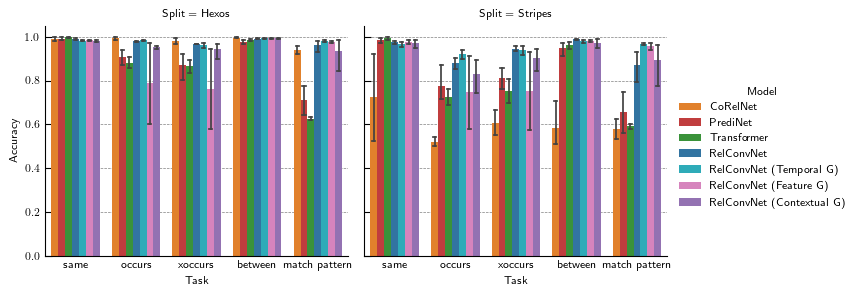

In [52]:
fig = sns.catplot(
    results_df_, kind='bar', col='Split', x='Task', y='Accuracy', hue='Model',
    sharey=True, legend='auto', legend_out=True, palette=color_map, **errbar_kwargs, height=3, aspect=1.15)
fig.savefig(f'{save_dir}/relgames_ood_acc.pdf')

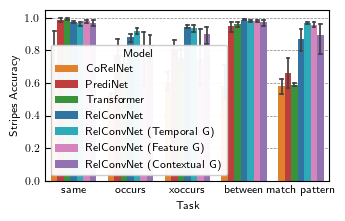

In [53]:
fig, ax = plt.subplots(figsize=(3.5, 2.25))
sns.barplot(results_df, y='Stripes Accuracy', x='Task', hue='Model', palette=color_map, **errbar_kwargs, ax=ax)
sns.move_legend(ax, "lower left", fancybox=True, frameon=True, framealpha=0.95)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/stripes_acc.pdf')

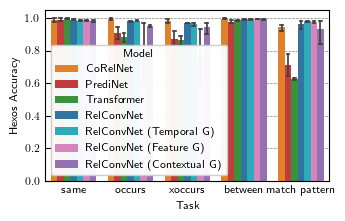

In [54]:
fig, ax = plt.subplots(figsize=(3.5, 2.25))
sns.barplot(results_df, y='Hexos Accuracy', x='Task', hue='Model', palette=color_map, **errbar_kwargs, ax=ax)
sns.move_legend(ax, "lower left", fancybox=True, frameon=True, framealpha=0.95)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/hexos_acc.pdf')

### Training curve figures

In [55]:
run_histories = pd.read_csv('figure_data/relational_games/project_run_histories.csv', index_col=0)
run_histories.head()

,_runtime,epoch/acc,batch/loss,batch/learning_rate,batch/acc,loss,_step,epoch/val_acc,epoch/val_loss,stripes_acc,...,_timestamp,acc,epoch/loss,stripes_loss,hexos_acc,epoch/learning_rate,trial,group,name,task
0,64.604571,NaN,0.693758,0.001,0.458984,NaN,0.0,NaN,NaN,NaN,...,1.697519e+09,NaN,NaN,NaN,NaN,NaN,4,contextgroup_relconvnet,trial = 4,same
1,64.871160,NaN,0.693057,0.001,0.511719,NaN,1.0,NaN,NaN,NaN,...,1.697519e+09,NaN,NaN,NaN,NaN,NaN,4,contextgroup_relconvnet,trial = 4,same
2,65.135622,NaN,0.692661,0.001,0.513021,NaN,2.0,NaN,NaN,NaN,...,1.697519e+09,NaN,NaN,NaN,NaN,NaN,4,contextgroup_relconvnet,trial = 4,same
3,65.401347,NaN,0.692245,0.001,0.512695,NaN,3.0,NaN,NaN,NaN,...,1.697519e+09,NaN,NaN,NaN,NaN,NaN,4,contextgroup_relconvnet,trial = 4,same
4,65.666886,NaN,0.691567,0.001,0.530859,NaN,4.0,NaN,NaN,NaN,...,1.697519e+09,NaN,NaN,NaN,NaN,NaN,4,contextgroup_relconvnet,trial = 4,same


In [56]:
tasks = ['same', 'occurs', 'xoccurs', '1task_between', '1task_match_patt']

def get_task_run_histories(run_histories, task):
    # task_filter
    task_filter = run_histories.task == task
    task_run_histories = run_histories[task_filter]

    # model filter / sorting
    models = ['relconvnet', 'corelnet', 'predinet', 'transformer']
    group_filter = task_run_histories.group.isin(models)
    task_run_histories = task_run_histories[group_filter]

    task_run_histories['group'] = pd.Categorical(task_run_histories['group'], categories=models, ordered=True)
    task_run_histories.sort_values('group', inplace=True)
    task_run_histories['group'] = task_run_histories['group'].map(model_label_map)
    task_run_histories.rename(columns={'group': 'Model'}, inplace=True)

    return task_run_histories

In [57]:
max_batch = 2000
step_size = 25
batch_steps_keep = np.arange(0, max_batch + 1, step_size)

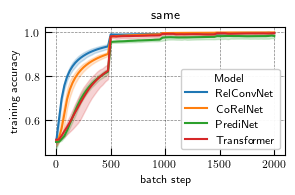

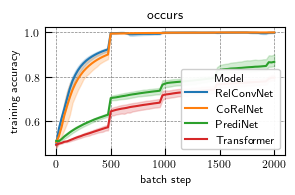

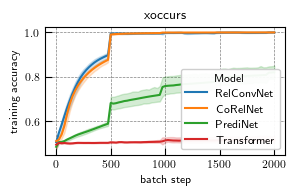

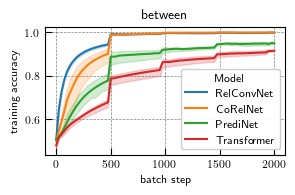

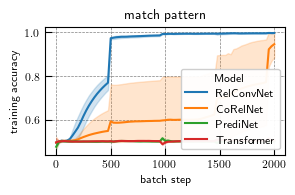

In [58]:
for task in tasks:
    task_run_histories = get_task_run_histories(run_histories, task)
    batch_filter = task_run_histories['batch/batch_step'].isin(batch_steps_keep)
    task_run_histories = task_run_histories[batch_filter]
    task_run_histories.rename(columns={'batch/batch_step': 'batch step', 'batch/acc': 'training accuracy'}, inplace=True)
    fig, ax = plt.subplots(figsize=(3, 2))
    sns.lineplot(task_run_histories, y='training accuracy', x='batch step', hue='Model', estimator='mean', errorbar=('ci', 95), ax=ax)
    ax.set_title(task_label_map.get(task, task))
    sns.move_legend(ax, "lower right", fancybox=True, frameon=True, framealpha=0.95)
    fig.set_tight_layout(True)
    fig.savefig(f'{save_dir}/{task}_training_curves.pdf')

In [61]:
model_label_map

{'corelnet': 'CoRelNet',
 'predinet': 'PrediNet',
 'transformer': 'Transformer',
 'relconvnet': 'RelConvNet',
 'tempgroup_relconvnet': 'RelConvNet (Temporal G)',
 'featuregroup_relconvnet': 'RelConvNet (Feature G)',
 'contextgroup_relconvnet': 'RelConvNet (Contextual G)'}

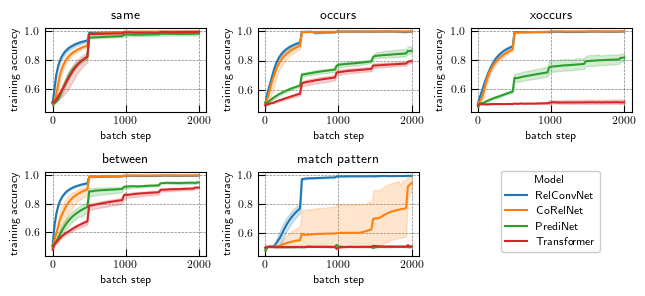

In [65]:
fig = plt.figure(figsize=(6.5,3))

axes = []
for i, task in enumerate(tasks):
    task_run_histories = get_task_run_histories(run_histories, task)
    batch_filter = task_run_histories['batch/batch_step'].isin(batch_steps_keep)
    task_run_histories = task_run_histories[batch_filter]
    task_run_histories.rename(columns={'batch/batch_step': 'batch step', 'batch/acc': 'training accuracy'}, inplace=True)
    ax = fig.add_subplot(2, 3, i+1)
    sns.lineplot(task_run_histories, y='training accuracy', x='batch step', hue='Model', estimator='mean', errorbar=('ci', 95), legend=False, ax=ax)
    ax.set_title(task_label_map.get(task, task))
    axes.append(ax)

# NOTE legend labels are hard-coded
fig.legend(handles=ax.get_lines(), labels=['RelConvNet', 'CoRelNet', 'PrediNet', 'Transformer'],  loc=(0.775, 0.15), title='Model')
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/all_training_curves.pdf')

## Contains 'SET'

### End-of-training accuracy

In [27]:
results_df = pd.read_csv('figure_data/contains_set/end-of-training-accuracy.csv', index_col=0)
models = ['relconvnet', 'corelnet', 'predinet', 'transformer']
group_filter = results_df.group.isin(models)
results_df = results_df[group_filter]

results_df['group'] = pd.Categorical(results_df['group'], categories=models, ordered=True)
results_df.sort_values('group', inplace=True)
results_df['group'] = results_df['group'].map(model_label_map)
results_df.rename(columns={'group': 'Model', 'acc': 'Accuracy'}, inplace=True)

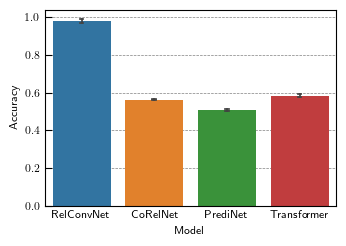

In [28]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))
sns.barplot(results_df, y='Accuracy', x='Model', **errbar_kwargs, ax=ax)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_acc.pdf')

### End-of-training acc table

In [29]:
agg_df = results_df.groupby(['Model'])['Accuracy'].aggregate(['mean', 'sem'])
agg_df = agg_df.round(3)
agg_df

,mean,sem
Model,,
RelConvNet,0.979,0.006
CoRelNet,0.563,0.001
PrediNet,0.508,0.002
Transformer,0.584,0.004


In [30]:
agg_df['Accuracy'] = agg_df.apply(lambda x: f"${x['mean']:0.3f} \pm {x['sem']:0.3f}$", axis=1)
agg_df = agg_df[['Accuracy']]
agg_df

,Accuracy
Model,
RelConvNet,$0.979 \pm 0.006$
CoRelNet,$0.563 \pm 0.001$
PrediNet,$0.508 \pm 0.002$
Transformer,$0.584 \pm 0.004$


In [31]:
input('overwrite latex table?')
latex_table = agg_df.to_latex(escape=False)
latex_table_file = f'{save_dir}/set_acc_table.tex'
with open(latex_table_file, 'w') as f:
    f.write(latex_table)

C:\Users\awnya\AppData\Local\Temp\ipykernel_31640\1189940456.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = agg_df.to_latex(escape=False)


### Training curves

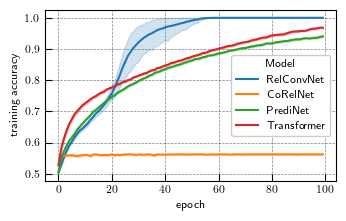

In [32]:
task_run_histories = pd.read_csv('figure_data/contains_set/run_history.csv', index_col=0)

# model filter / sorting
models = ['relconvnet', 'corelnet', 'predinet', 'transformer']
group_filter = task_run_histories.group.isin(models)
task_run_histories = task_run_histories[group_filter]

task_run_histories['group'] = pd.Categorical(task_run_histories['group'], categories=models, ordered=True)
task_run_histories.sort_values('group', inplace=True)
task_run_histories['group'] = task_run_histories['group'].map(model_label_map)
task_run_histories.rename(columns={'group': 'Model'}, inplace=True)
task_run_histories.rename(columns={'epoch/epoch': 'epoch', 'epoch/acc': 'training accuracy'}, inplace=True)
fig, ax = plt.subplots(figsize=(3.5, 2.25))
sns.lineplot(task_run_histories, y='training accuracy', x='epoch', hue='Model', estimator='mean', errorbar=('ci', 95), ax=ax)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_training_curves_trainacc.pdf')

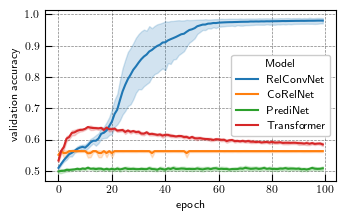

In [33]:
task_run_histories = pd.read_csv('figure_data/contains_set/run_history.csv', index_col=0)

# model filter / sorting
models = ['relconvnet', 'corelnet', 'predinet', 'transformer']
group_filter = task_run_histories.group.isin(models)
task_run_histories = task_run_histories[group_filter]

task_run_histories['group'] = pd.Categorical(task_run_histories['group'], categories=models, ordered=True)
task_run_histories.sort_values('group', inplace=True)
task_run_histories['group'] = task_run_histories['group'].map(model_label_map)
task_run_histories.rename(columns={'group': 'Model'}, inplace=True)
task_run_histories.rename(columns={'epoch/epoch': 'epoch', 'epoch/val_acc': 'validation accuracy'}, inplace=True)
fig, ax = plt.subplots(figsize=(3.5, 2.25))
sns.lineplot(task_run_histories, y='validation accuracy', x='epoch', hue='Model', estimator='mean', errorbar=('ci', 95), ax=ax)
fig.set_tight_layout(True)
fig.savefig(f'{save_dir}/contains_set_training_curves_valacc.pdf')